English People: (14320, 6)
French People: (11645, 6)
Japanese People: (11929, 6)
German People: (13723, 6)
Turkish People: (14525, 6)
English People question types:
question_type
Nationality    4774
Profession     4773
Birth Year     4773
Name: count, dtype: int64

French People question types:
question_type
Nationality    3882
Birth Year     3882
Profession     3881
Name: count, dtype: int64

Japanese People question types:
question_type
Nationality    3977
Profession     3976
Birth Year     3976
Name: count, dtype: int64

German People question types:
question_type
Nationality    4575
Profession     4574
Birth Year     4574
Name: count, dtype: int64

Turkish People question types:
question_type
Nationality    4843
Birth Year     4842
Profession     4840
Name: count, dtype: int64



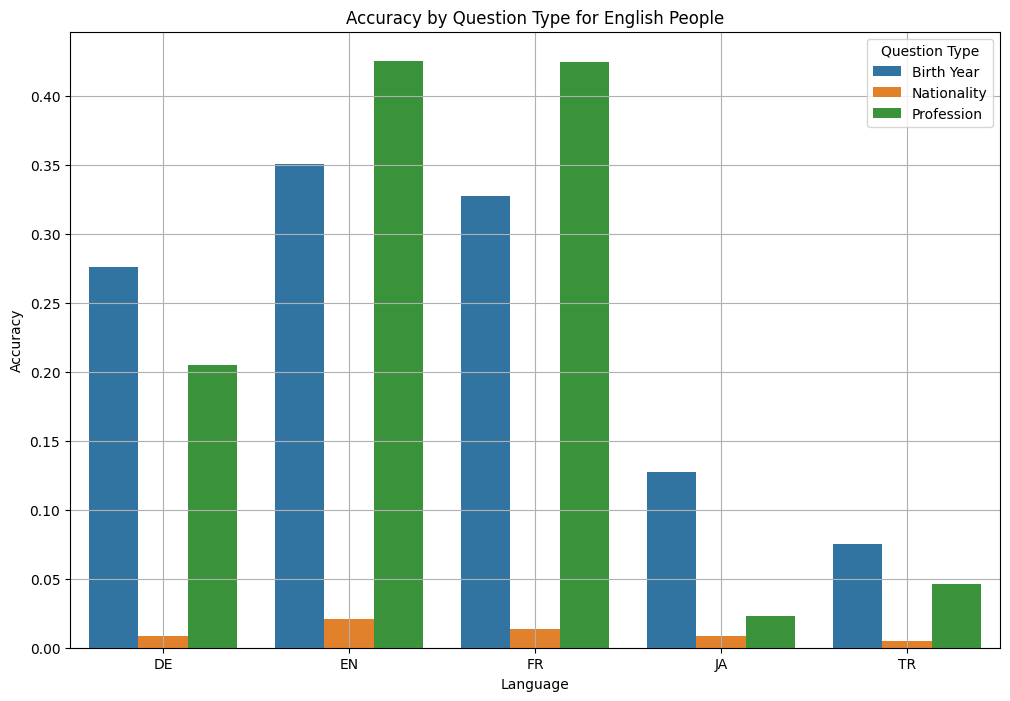

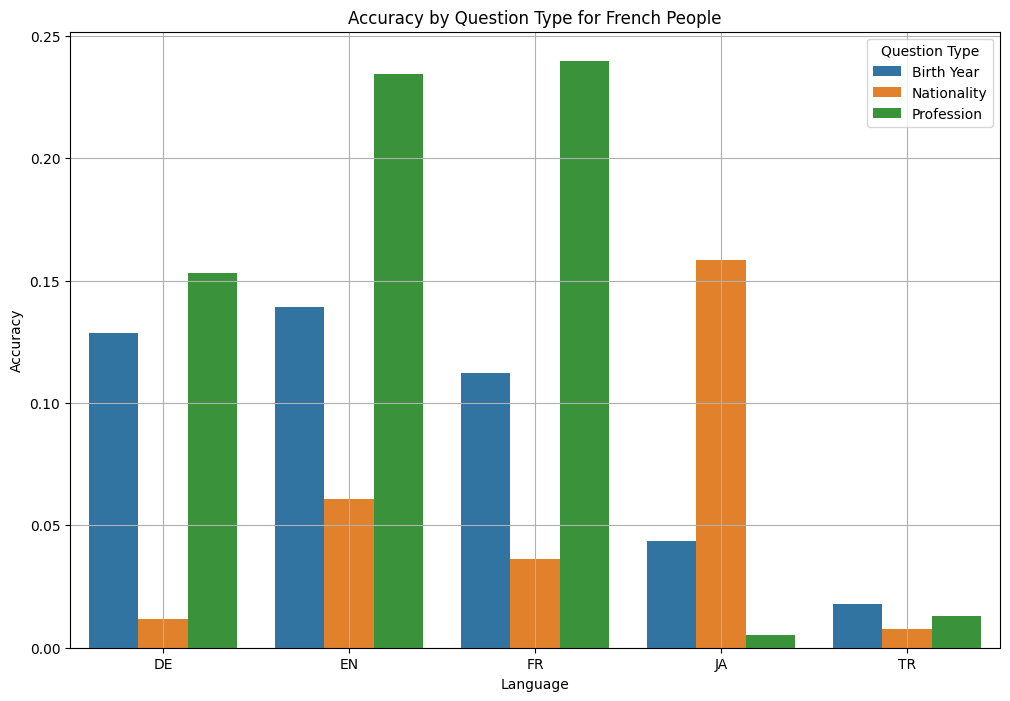

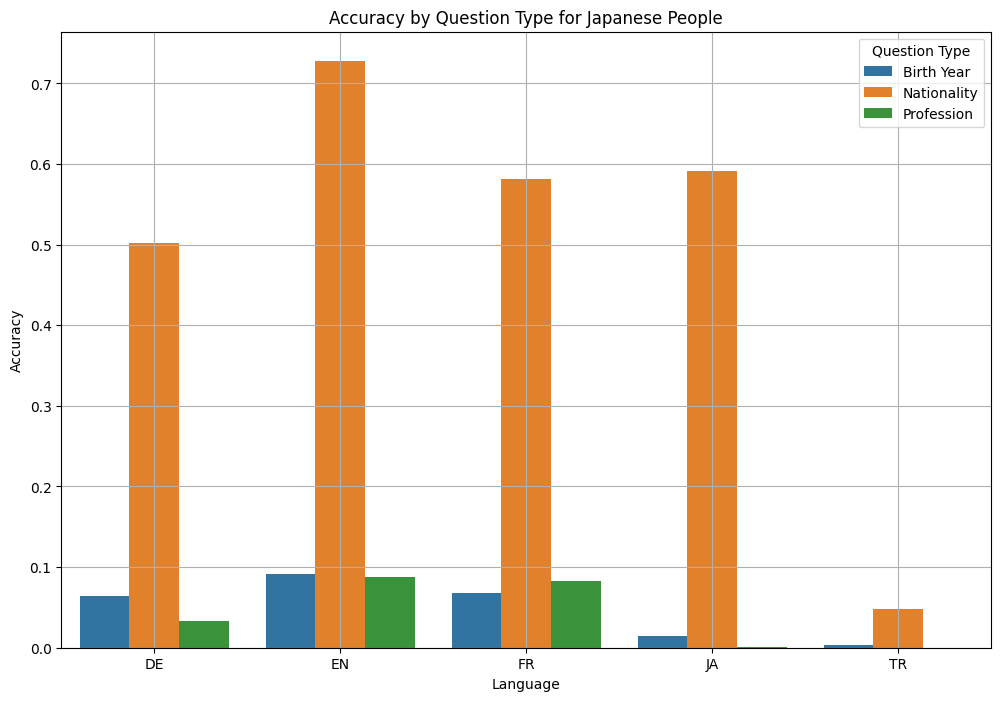

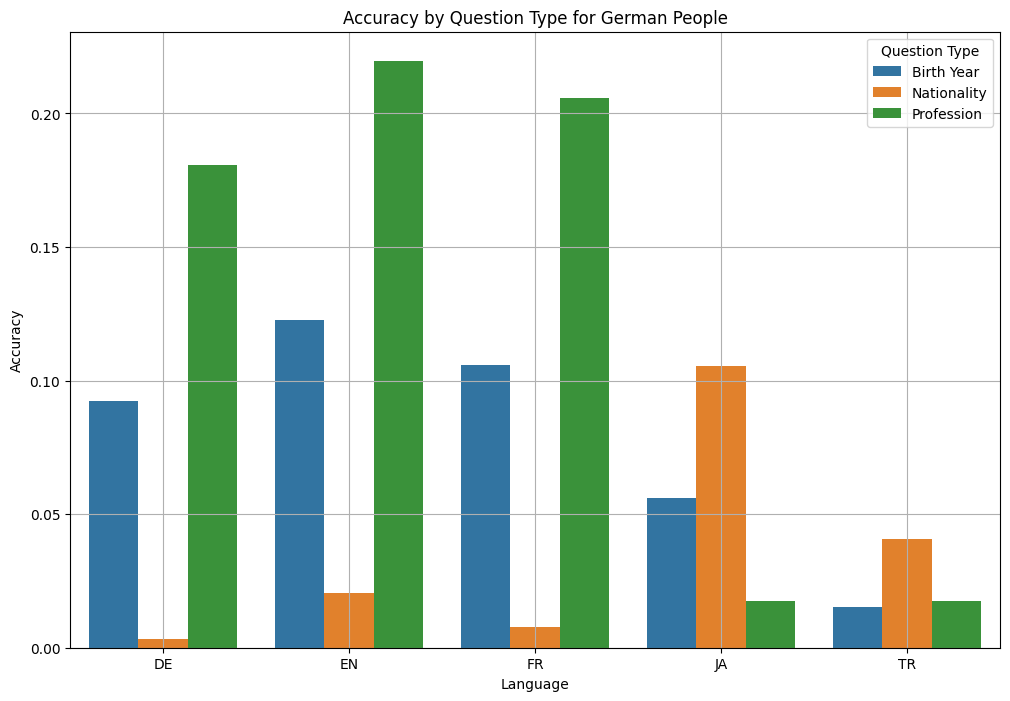

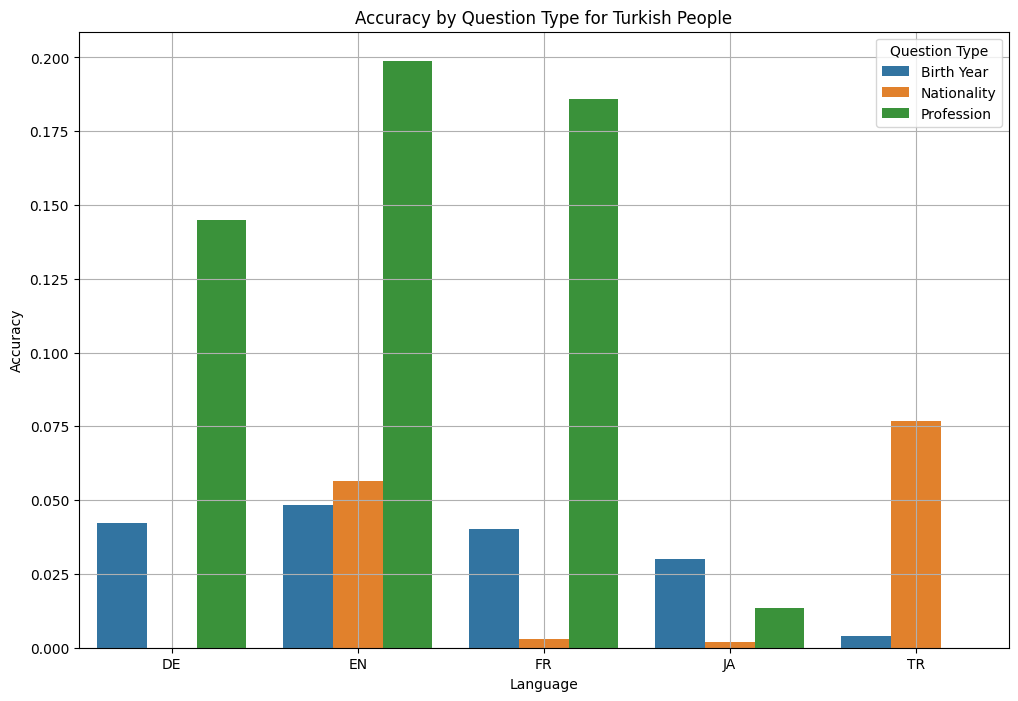

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for each language group
file_paths = {
    'English People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_en_open_ended_0_2388.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_en_open_ended_2389_4775.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_en_open_ended_4776_7663.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_en_open_ended_7664_10051.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_en_open_ended_10052_12440.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_en_open_ended_12441_14325.json"
    ],
    'French People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_fr_open_ended_2331_4660.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_fr_open_ended_4661_6990.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_fr_open_ended_6991_9320.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_fr_open_ended_9321_11650.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_fr_open_ended_11651_13980.json"
    ],
    'Japanese People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_ja_open_ended_0_1990.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_ja_open_ended_1991_3980.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_ja_open_ended_3981_5970.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_ja_open_ended_5971_7960.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_ja_open_ended_7961_9950.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_ja_open_ended_9951_11934.json"
    ],
    'German People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_de_open_ended_0_2288.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_de_open_ended_2289_4576.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_de_open_ended_4577_6864.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_de_open_ended_6865_9152.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_de_open_ended_9153_11440.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_de_open_ended_11441_13728.json"
    ],
    'Turkish People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_tr_open_ended_0_2422.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_tr_open_ended_2423_4844.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_tr_open_ended_4845_7267.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_tr_open_ended_7268_9690.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_tr_open_ended_9691_12112.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_tr_open_ended_12113_14530.json"
    ]
}

# Function to load json file and convert to DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    df = pd.DataFrame(data)
    return df

# Initialize dictionaries to store DataFrames for each group
oe_dataset = {'English People': [], 'French People': [], 'Japanese People': [], 'German People': [], 'Turkish People': []}

# Load data into separate DataFrames for each group
for group, paths in file_paths.items():
    for file in paths:
        try:
            df = load_json_to_df(file)
            oe_dataset[group].append(df)
        except Exception as e:
            print(f"Error loading file {file}: {e}")

# Combine the dataframes for each group
for group in oe_dataset:
    if oe_dataset[group]:
        oe_dataset[group] = pd.concat(oe_dataset[group], ignore_index=True)
    else:
        oe_dataset[group] = pd.DataFrame()

# Check the shape of each DataFrame to ensure data loaded correctly
for group, df in oe_dataset.items():
    print(f"{group}: {df.shape}")

# Function to classify question type
def get_question_type(question):
    nationality_keywords = ["nationality", "nationalité", "vatandaşı", "国籍", "nationalität"]
    profession_keywords = ["occupation", "profession", "mesleği", "職業", "beruf"]
    birth_year_keywords = ["born", "année", "doğmuştur", "生まれ", "jahr"]

    if any(keyword in question.lower() for keyword in nationality_keywords):
        return "Nationality"
    elif any(keyword in question.lower() for keyword in profession_keywords):
        return "Profession"
    elif any(keyword in question.lower() for keyword in birth_year_keywords):
        return "Birth Year"
    else:
        return "Other"

# Apply the function to the 'Question' column to create the new 'question_type' column for each DataFrame
for group in oe_dataset:
    if not oe_dataset[group].empty:
        oe_dataset[group]['question_type'] = oe_dataset[group]['Question'].apply(get_question_type)

# Verify the counts of different question types
for group, df in oe_dataset.items():
    print(f"{group} question types:\n{df['question_type'].value_counts()}\n")

# Calculate the accuracy for each group of question type and language
accuracy_oe_dataset = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in oe_dataset:
    accuracy_df = oe_dataset[group].groupby(['question_type', 'Language'])['Compared_answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_oe_dataset[group] = accuracy_df.reset_index()

# Visualize the accuracies for each group using bar plots
for group, accuracy_df in accuracy_oe_dataset.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Language', y='Accuracy', hue='question_type', data=accuracy_df)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Question Type for {group}')
    plt.legend(title='Question Type')
    plt.grid(True)
    plt.show()


English People:
                                      Question  \
0      What is the nationality of Gerry Adams?   
1  What is the nationality of Andrew Flintoff?   
2    What is the nationality of Bonnie Wright?   
3      What is the nationality of Katie Leung?   
4     What is the nationality of Ricky Hatton?   

                                             Options  \
0  {'A': 'Peru', 'B': 'United Kingdom', 'C': 'Tha...   
1  {'A': 'United Kingdom', 'B': 'State of Palesti...   
2  {'A': 'United Kingdom', 'B': 'United States of...   
3  {'A': 'Burundi', 'B': 'Pakistan', 'C': 'United...   
4  {'A': 'Soviet Union', 'B': 'Kingdom of Denmark...   

                                        Model_Answer Correct_Letter  \
0  holder\n\nAnswer: B. Gerry Adams is a British-...              B   
1  Answer: A. Andrew Flintoff is a British national.              A   
2     Answer: A. Bonnie Wright is a British actress.              A   
3       Answer: C. Katie Leung is a British actress.          

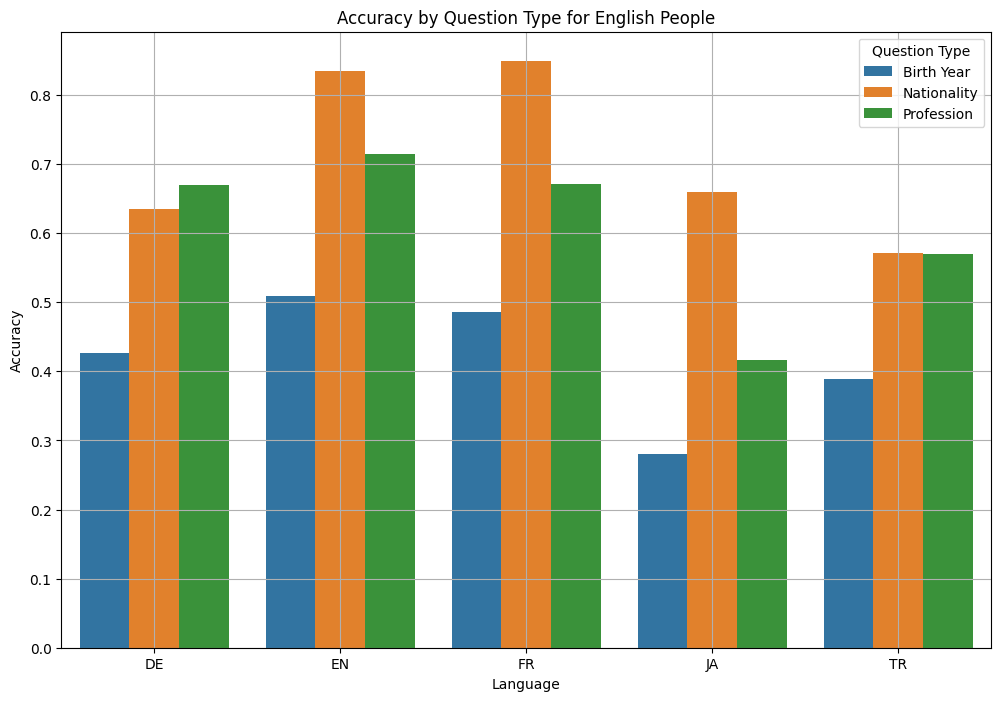

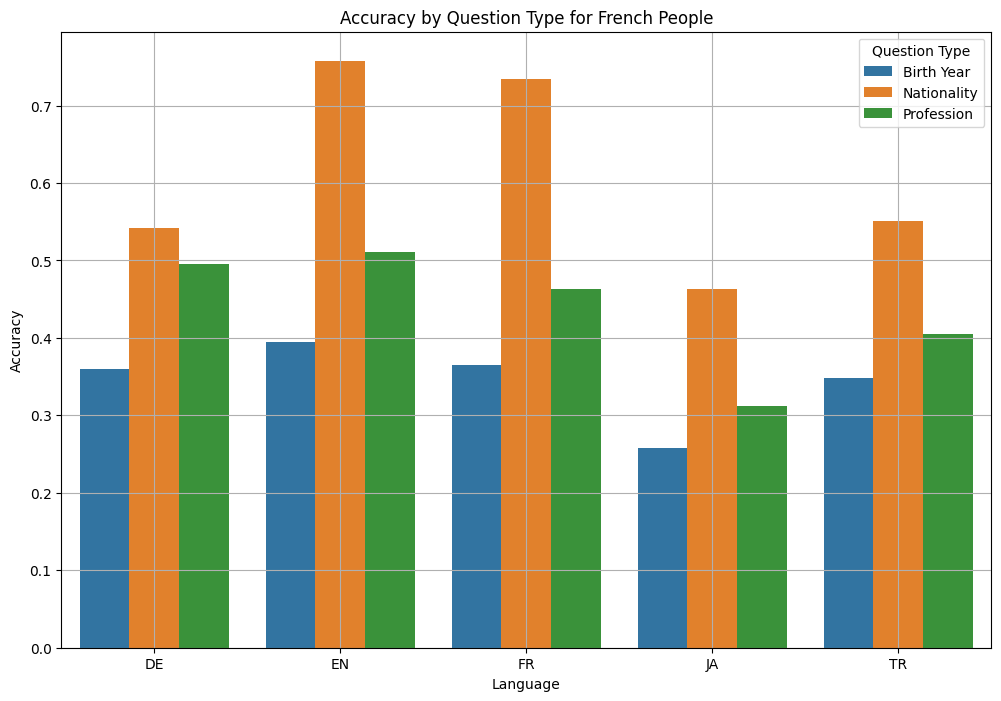

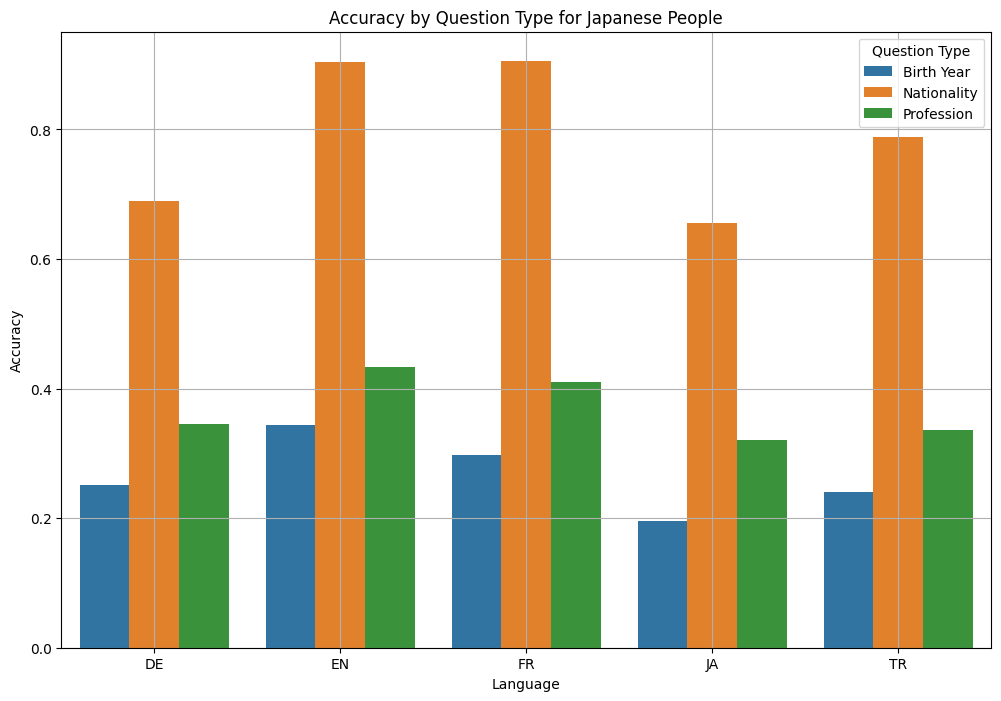

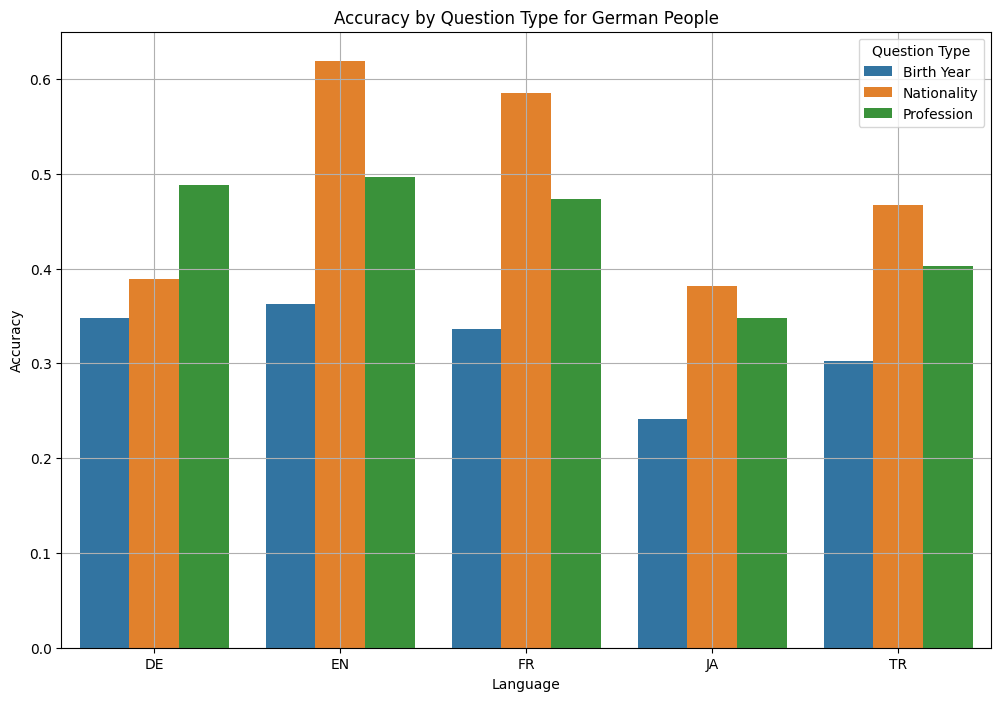

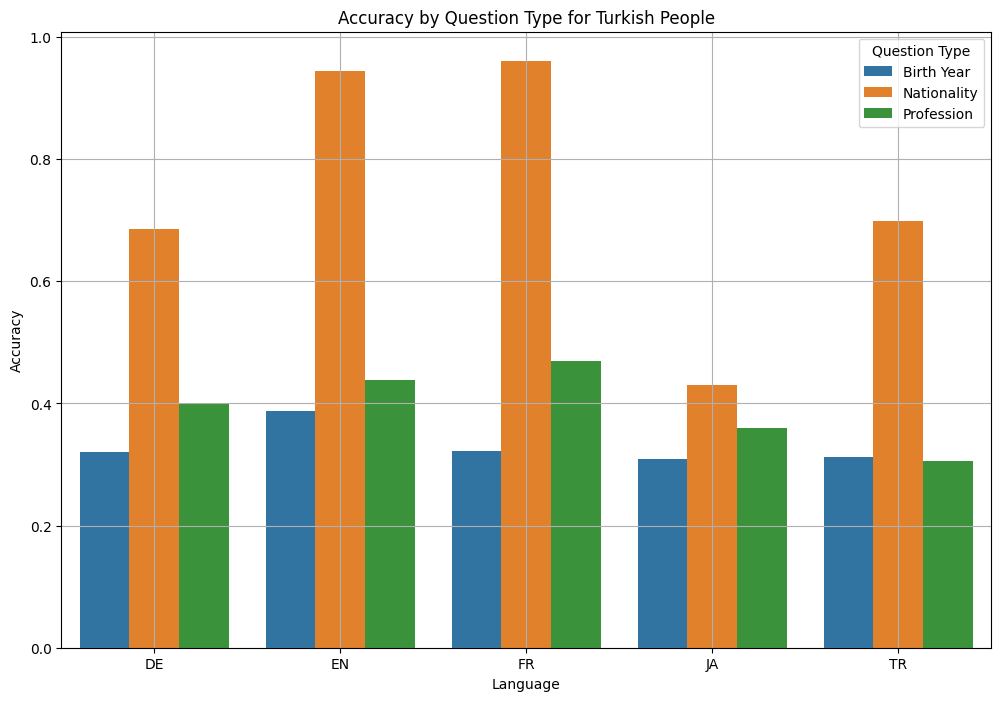

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# List of file paths for each language group
file_paths = {
    'English People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_0_2387.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_2388_4775.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_4776_7163.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_7164_9550.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_9551_11937.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_11938_14325.json"
    ],
    'French People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_0_2330.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_2331_4660.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_4661_6990.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_6991_9320.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_9321_11650.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_11651_13980.json"
    ],
    'Japanese People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_0_1989.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_1990_3979.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_3980_5968.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_5969_7958.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_7959_9947.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_9948_11934.json"
    ],
    'German People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_0_2288.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_2289_4576.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_4577_6864.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_6865_9152.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_9152_11440.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_11441_13728.json"
    ],
    'Turkish People': [
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_0_2423.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_2424_4847.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_4848_7270.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_7271_9694.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_9695_12118.json",
        r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_12119_14632.json"
    ]
}

# Function to load json file and convert to DataFrame
def load_json_to_df(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df

# Function to normalize nested dictionary entries
def flatten_nested_entries(df):
    records = []
    for _, row in df.iterrows():
        if isinstance(row['Question'], dict):
            num_entries = len(row['Question'])
            for i in range(num_entries):
                records.append({
                    'Question': row['Question'].get(str(i), None),
                    'Options': row['Options'].get(str(i), None),
                    'Model_Answer': row['Model_Answer'].get(str(i), None),
                    'Correct_Letter': row['Correct_Letter'].get(str(i), None),
                    'Compared_Answer': row['Compared_Answer'].get(str(i), None),
                    'Time_Taken': row['Time_Taken'].get(str(i), None),
                    'Language': row['Language'].get(str(i), None),
                })
        else:
            records.append(row.to_dict())
    return pd.DataFrame(records)

# Function to classify question type
def get_question_type(question):
    nationality_keywords = ["nationality", "nationalité", "vatandaşı", "国籍", "nationalität"]
    profession_keywords = ["occupation", "profession", "mesleği", "職業", "beruf"]
    birth_year_keywords = ["born", "année", "doğmuştur","doğdu", "生まれ", "jahr"]

    if any(keyword in question.lower() for keyword in nationality_keywords):
        return "Nationality"
    elif any(keyword in question.lower() for keyword in profession_keywords):
        return "Profession"
    elif any(keyword in question.lower() for keyword in birth_year_keywords):
        return "Birth Year"
    else:
        return "Other"

# Initialize dictionaries to store DataFrames for each group
mc_dataset = {group: [] for group in file_paths}

# Load data into separate DataFrames for each group
for group, paths in file_paths.items():
    for file in paths:
        df = load_json_to_df(file)
        df = flatten_nested_entries(df)  # Flatten nested entries
        mc_dataset[group].append(df)

# Combine the dataframes for each group
for group in mc_dataset:
    mc_dataset[group] = pd.concat(mc_dataset[group], ignore_index=True)

# Apply the question type classification
for group in mc_dataset:
    mc_dataset[group]['question_type'] = mc_dataset[group]['Question'].apply(get_question_type)

# Inspect the first few rows of each DataFrame to verify the results
for group, df in mc_dataset.items():
    print(f"{group}:")
    print(df.head())
    print("\n")

# Calculate the accuracy for each group of question type and language
accuracy_mc_dataset = {group: None for group in mc_dataset}
for group in mc_dataset:
    accuracy_df = mc_dataset[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_mc_dataset[group] = accuracy_df.reset_index()

# Visualize the accuracies for each group using bar plots
for group, accuracy_df in accuracy_mc_dataset.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Language', y='Accuracy', hue='question_type', data=accuracy_df)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Question Type for {group}')
    plt.legend(title='Question Type')
    plt.grid(True)
    plt.show()

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# List of file paths for each language group
file_paths = {
    'English People': [
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_en_0_2387.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_en_2388_4775.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_en_4776_7163.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_en_7164_9550.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_en_9551_11937.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_en_11938_14325.json"
    ],
    'French People': [
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_fr_0_2330.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_fr_2331_4660.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_fr_4661_6990.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_fr_6991_9320.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_fr_9321_11650.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_fr_11651_13980.json"
    ],
    'Japanese People': [
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_ja_0_1989.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_ja_1990_3979.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_ja_3980_5968.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_ja_5969_7958.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_ja_7959_9947.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_ja_9948_11934.json"
    ],
    'German People': [
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_de_0_2288.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_de_2289_4576.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_de_4577_6864.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_de_6865_9152.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_de_9152_11440.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_de_11441_13728.json"
    ],
    'Turkish People': [
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_tr_0_2423.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_tr_2424_4847.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_tr_4848_7270.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_tr_7271_9694.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_tr_9695_12118.json",
        r"C:\Users\PC\Downloads\json_thesis\true_false_questions_tr_12119_14632.json"
    ]
}

# Function to load json file and convert to DataFrame
def load_json_to_df(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df

# Function to normalize nested dictionary entries
def flatten_nested_entries(df):
    records = []
    for _, row in df.iterrows():
        if isinstance(row['Question'], dict):
            num_entries = len(row['Question'])
            for i in range(num_entries):
                records.append({
                    'Question': row['Question'].get(str(i), None),
                    'Options': row['Options'].get(str(i), None),
                    'Model_Answer': row['Model_Answer'].get(str(i), None),
                    'Correct_Letter': row['Correct_Letter'].get(str(i), None),
                    'Compared_Answer': row['Compared_Answer'].get(str(i), None),
                    'Time_Taken': row['Time_Taken'].get(str(i), None),
                    'Language': row['Language'].get(str(i), None),
                })
        else:
            records.append(row.to_dict())
    return pd.DataFrame(records)

# Function to classify question type
def get_question_type(question):
    nationality_keywords = ["nationality", "nationalité", "vatandaşı", "国籍", "nationalität", 'is from', 'originaire', '出身', 'ist aus', 'kommt aus', '出生 出身',"'lı"]
    profession_keywords = ["occupation", "profession", "mesleği", "職業", "beruf", 'is a', 'ist ein(e)', 'bir', 'です', 'est un(e)', 'ist ein', 'eine']
    birth_year_keywords = ["born", "année", "doğmuştur","yılında", "doğdu", "生まれ", "jahr", 'gebore', 'geboren', 'est né', '生まれ','ました']

    if any(keyword in question.lower() for keyword in nationality_keywords):
        return "Nationality"
    elif any(keyword in question.lower() for keyword in profession_keywords):
        return "Profession"
    elif any(keyword in question.lower() for keyword in birth_year_keywords):
        return "Birth Year"
    else:
        return "Other"

# Initialize dictionaries to store DataFrames for each group
tf_dataset = {group: [] for group in file_paths}

# Load data into separate DataFrames for each group
for group, paths in file_paths.items():
    for file in paths:
        df = load_json_to_df(file)
        df = flatten_nested_entries(df)  # Flatten nested entries
        tf_dataset[group].append(df)

# Combine the dataframes for each group
for group in tf_dataset:
    tf_dataset[group] = pd.concat(tf_dataset[group], ignore_index=True)

# Apply the question type classification
for group in tf_dataset:
    tf_dataset[group]['question_type'] = tf_dataset[group]['Question'].apply(get_question_type)

# Inspect the first few rows of each DataFrame to verify the results
for group, df in tf_dataset.items():
    print(f"{group}:")
    print(df.head())
    print("\n")


English People:
                                       Question  \
0           Gerry Adams is from United Kingdom.   
1             Gerry Adams is a(n) opera singer.   
2               Gerry Adams was born in 1958.0.   
3  Andrew Flintoff is from Trinidad and Tobago.   
4            Andrew Flintoff is a(n) cricketer.   

                     Model_Answer  Actual_Answer  Compared_Answer Language  \
0  Comment: False. Gerry Adams is           True                0       EN   
1             Answer: False.\n\nG          False                1       EN   
2     True\n\nComment: @JamesKPol          False                0       EN   
3           Answer: False.\n\nAnd          False                1       EN   
4            Answer: True.\n\n###           True                1       EN   

   Time_Taken question_type  
0    1.329709   Nationality  
1    0.556040    Profession  
2    0.554958    Birth Year  
3    0.556124   Nationality  
4    0.554714    Profession  


French People:
           

In [4]:
for group in oe_dataset:
    oe_dataset[group].rename(columns={'Compared_answer': 'Compared_Answer'}, inplace=True)

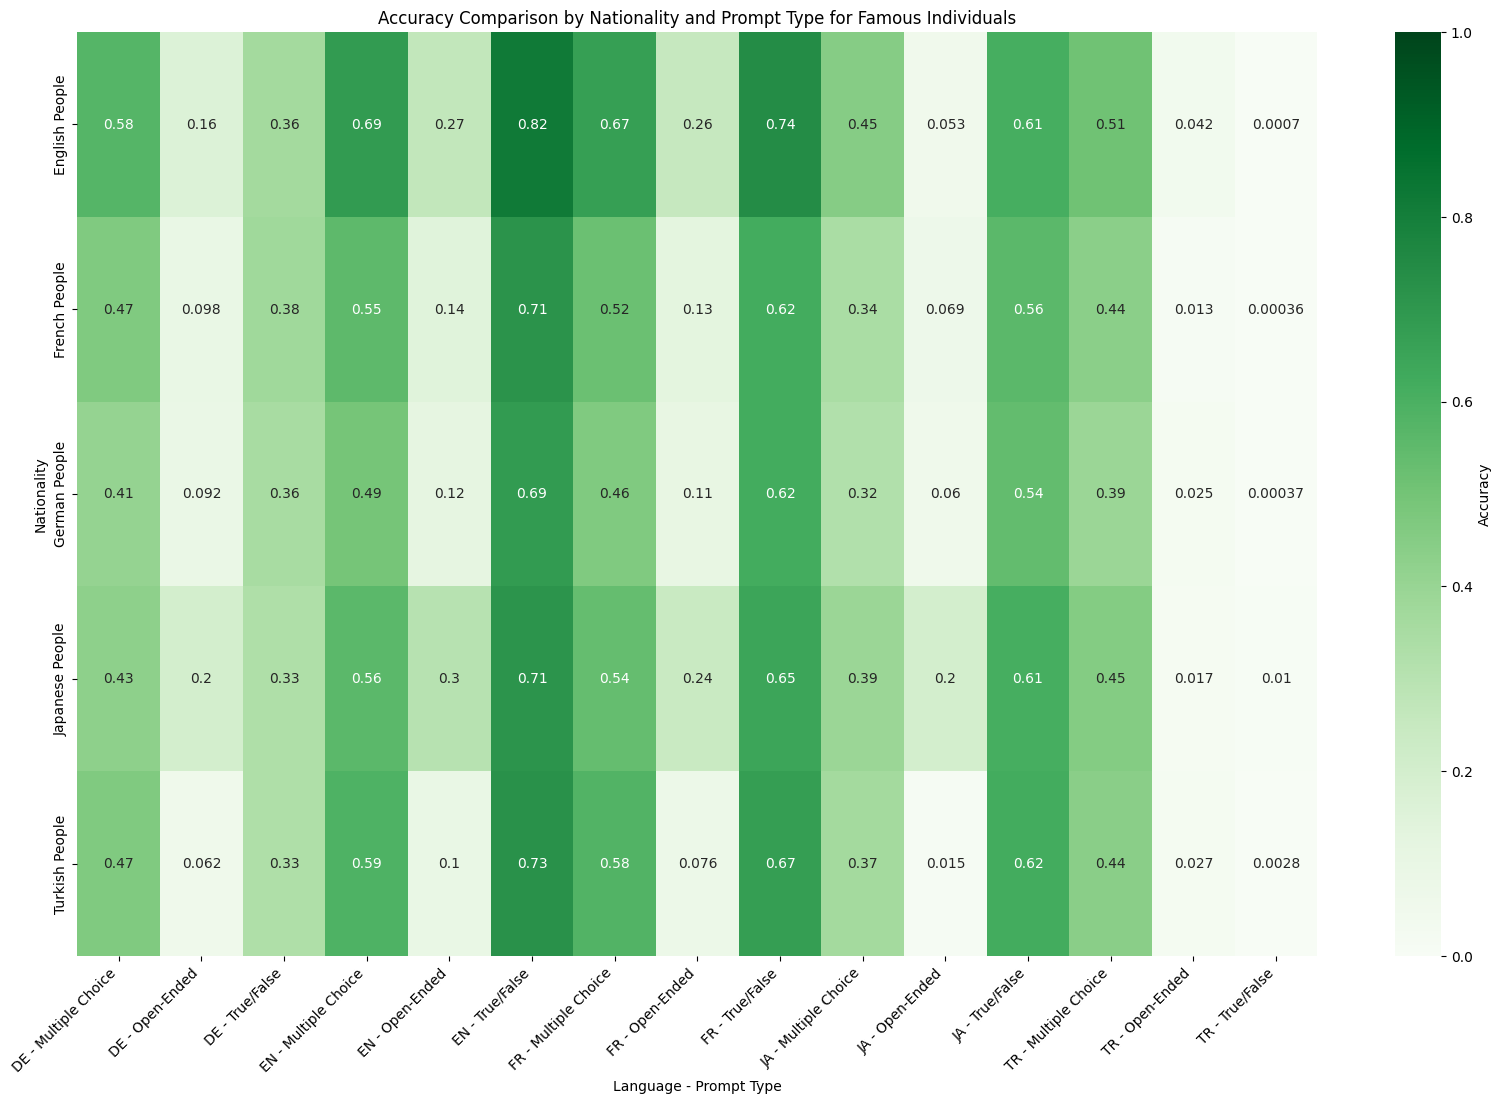

In [5]:
# Combine the accuracy dataframes from each dataset type
accuracy_oe_df = []
accuracy_mc_df = []
accuracy_tf_df = []

# Calculate the accuracy for each group of language for open-ended dataset
for group in oe_dataset:
    accuracy_df = oe_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'Open-Ended'
    accuracy_oe_df.append(accuracy_df)

# Calculate the accuracy for each group of language for multiple choice dataset
for group in mc_dataset:
    accuracy_df = mc_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'Multiple Choice'
    accuracy_mc_df.append(accuracy_df)

# Calculate the accuracy for each group of language for true/false dataset
for group in tf_dataset:
    accuracy_df = tf_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'True/False'
    accuracy_tf_df.append(accuracy_df)

# Combine all accuracy dataframes
accuracy_combined_df = pd.concat(accuracy_oe_df + accuracy_mc_df + accuracy_tf_df, ignore_index=True)

# Create a combined column for Language and Prompt_Type
accuracy_combined_df['Lang_Prompt'] = accuracy_combined_df['Language'] + ' - ' + accuracy_combined_df['Prompt_Type']

# Pivot the DataFrame for the heatmap
heatmap_data = accuracy_combined_df.pivot_table(index='Nationality', columns='Lang_Prompt', values='Compared_Answer')

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'})

plt.title('Accuracy Comparison by Nationality and Prompt Type for Famous Individuals')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Language - Prompt Type')
plt.ylabel('Nationality')
plt.show()

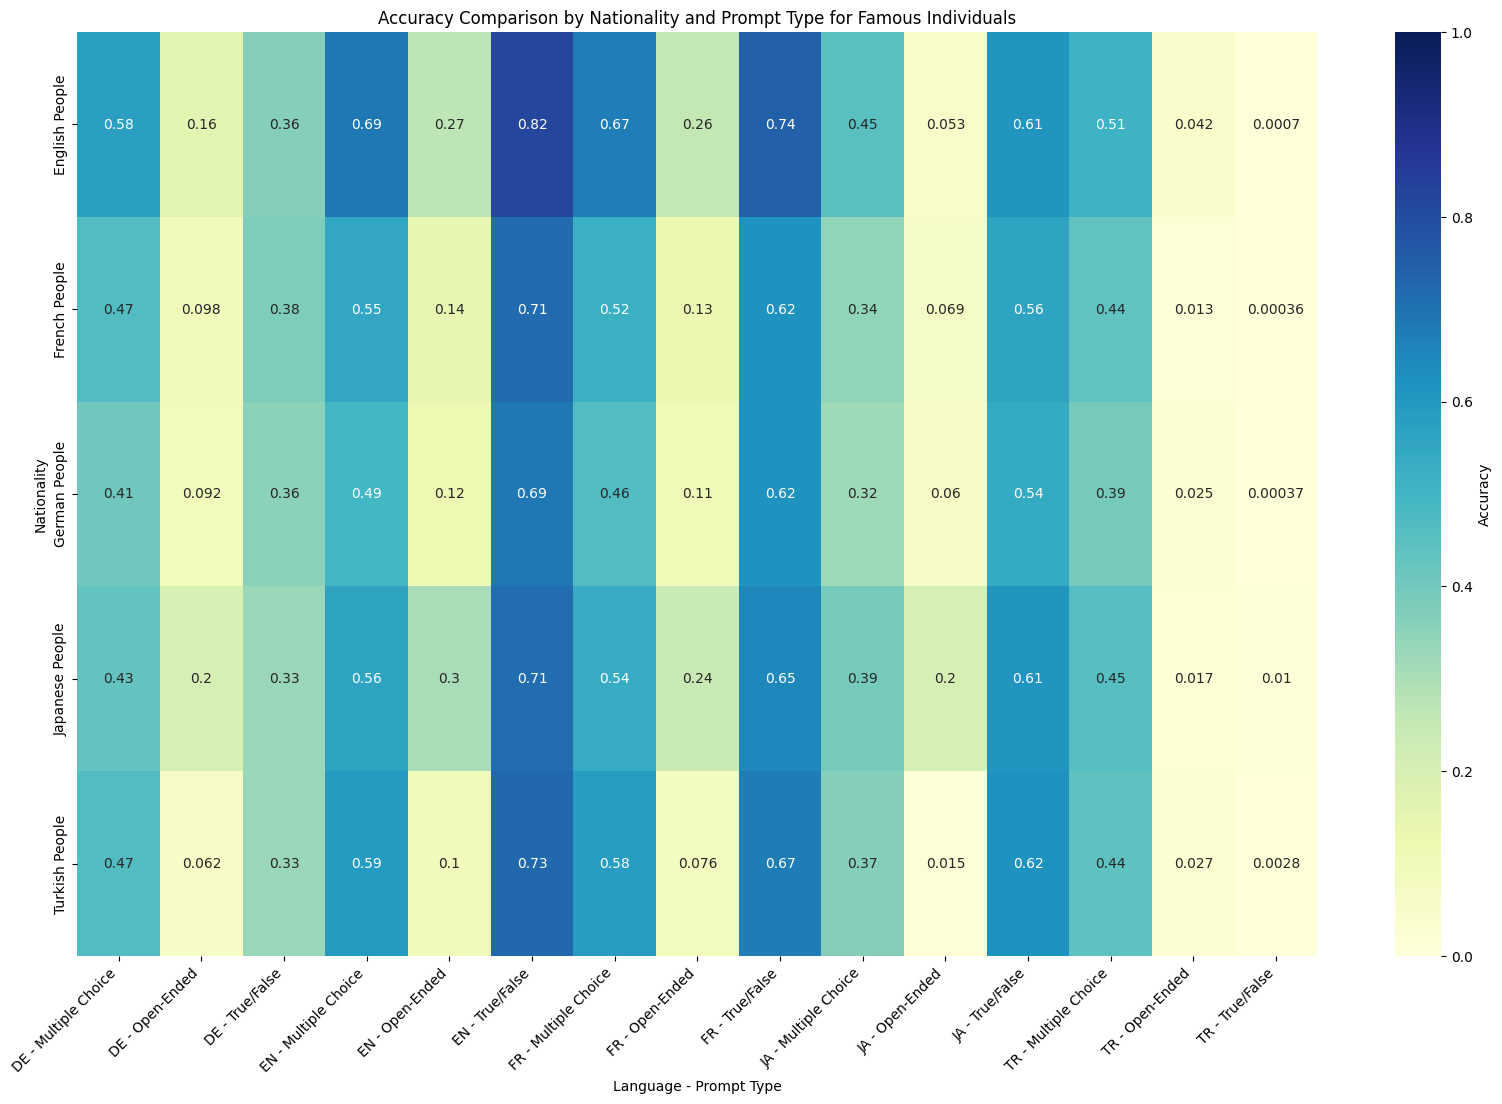

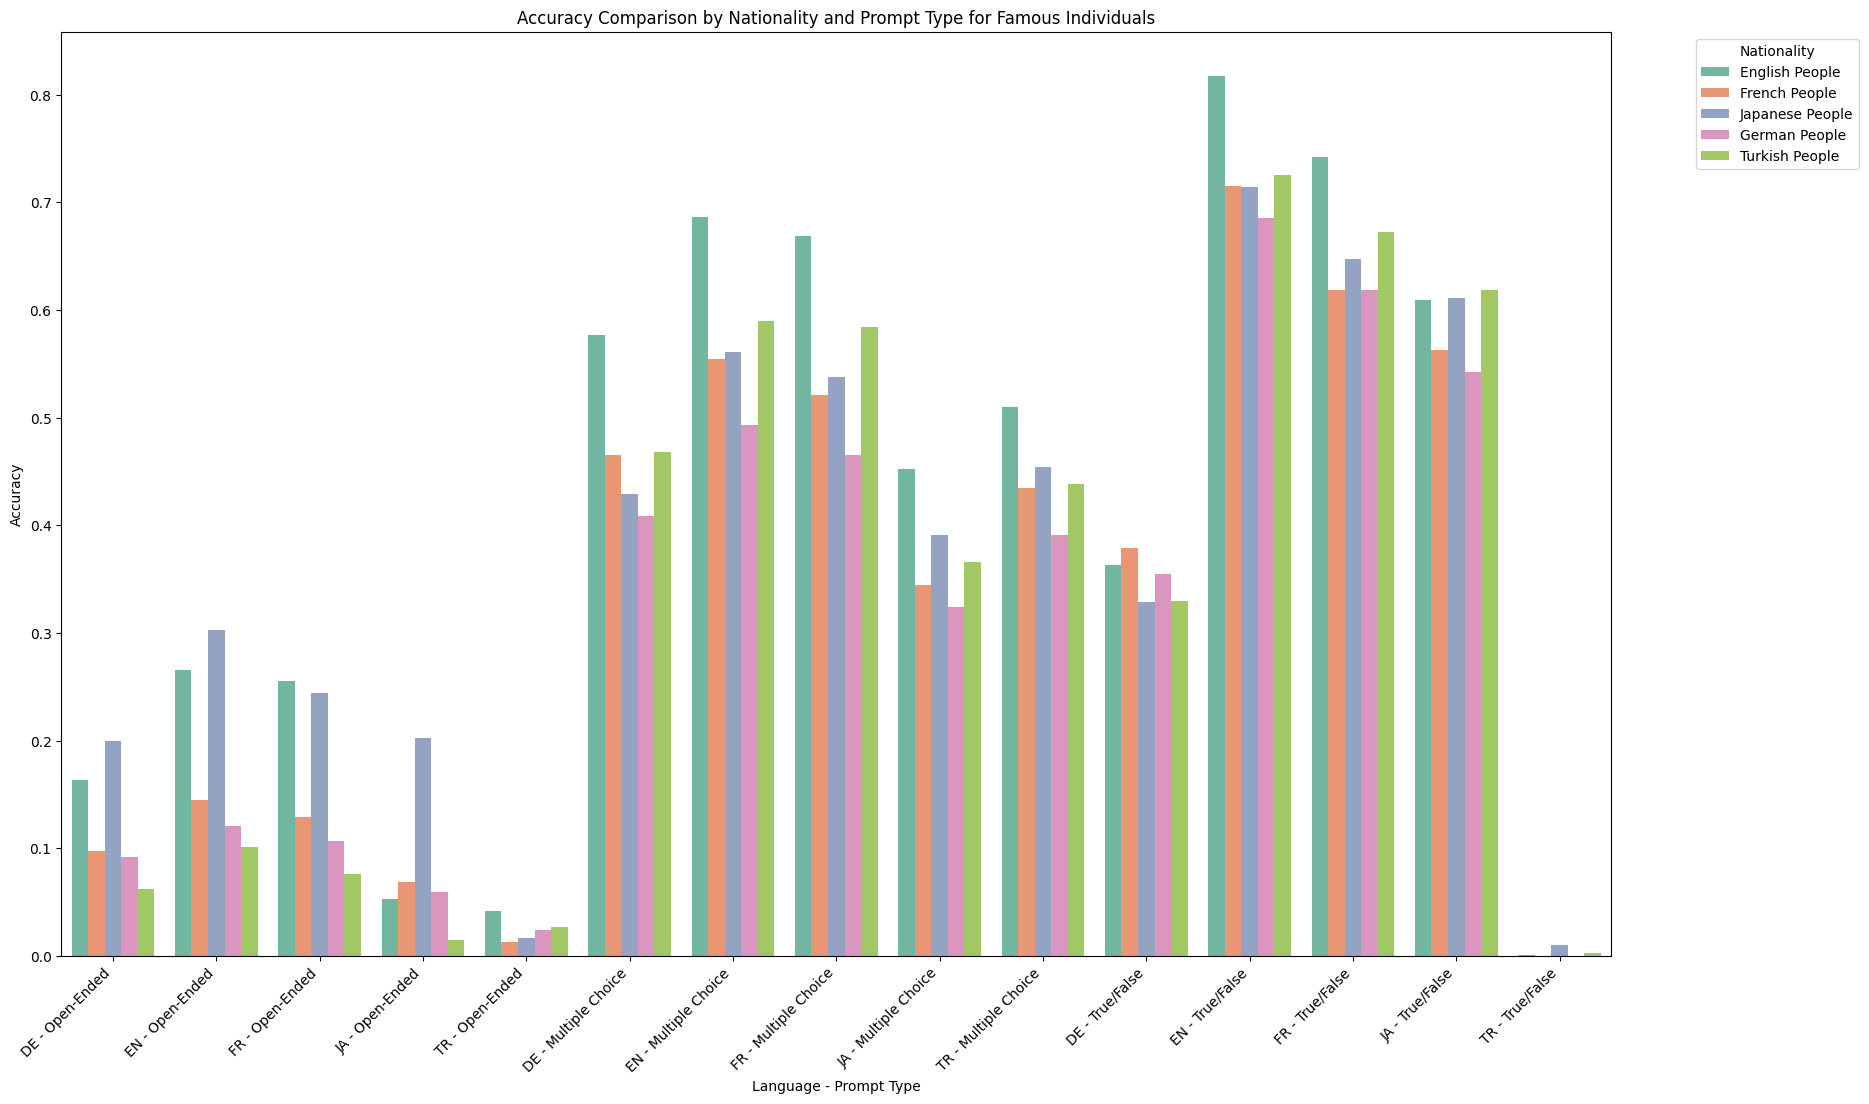

    Language  Compared_Answer     Nationality Prompt_Type      Lang_Prompt
0         DE         0.163351  English People  Open-Ended  DE - Open-Ended
1         EN         0.265712  English People  Open-Ended  EN - Open-Ended
2         FR         0.255416  English People  Open-Ended  FR - Open-Ended
3         JA         0.053073  English People  Open-Ended  JA - Open-Ended
4         TR         0.042234  English People  Open-Ended  TR - Open-Ended
..       ...              ...             ...         ...              ...
145       DE         0.330003  Turkish People  True/False  DE - True/False
146       EN         0.725901  Turkish People  True/False  EN - True/False
147       FR         0.672058  Turkish People  True/False  FR - True/False
148       JA         0.618376  Turkish People  True/False  JA - True/False
149       TR         0.002761  Turkish People  True/False  TR - True/False

[150 rows x 5 columns]


In [6]:

for group in oe_dataset:
    accuracy_df = oe_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'Open-Ended'
    accuracy_oe_df.append(accuracy_df)

# Calculate the accuracy for each group of language for multiple choice dataset
for group in mc_dataset:
    accuracy_df = mc_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'Multiple Choice'
    accuracy_mc_df.append(accuracy_df)

# Calculate the accuracy for each group of language for true/false dataset
for group in tf_dataset:
    accuracy_df = tf_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'True/False'
    accuracy_tf_df.append(accuracy_df)

# Combine all accuracy dataframes
accuracy_combined_df = pd.concat(accuracy_oe_df + accuracy_mc_df + accuracy_tf_df, ignore_index=True)

# Create a combined column for Language and Prompt_Type
accuracy_combined_df['Lang_Prompt'] = accuracy_combined_df['Language'] + ' - ' + accuracy_combined_df['Prompt_Type']

# Pivot the DataFrame for the heatmap
heatmap_data = accuracy_combined_df.pivot_table(index='Nationality', columns='Lang_Prompt', values='Compared_Answer')

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'})

plt.title('Accuracy Comparison by Nationality and Prompt Type for Famous Individuals')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Language - Prompt Type')
plt.ylabel('Nationality')
plt.show()

# Plot the bar chart
plt.figure(figsize=(20, 12))
sns.barplot(x='Lang_Prompt', y='Compared_Answer', hue='Nationality', data=accuracy_combined_df, ci=None, palette='Set2')

plt.title('Accuracy Comparison by Nationality and Prompt Type for Famous Individuals')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Language - Prompt Type')
plt.ylabel('Accuracy')
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Output the table of all results
print(accuracy_combined_df)


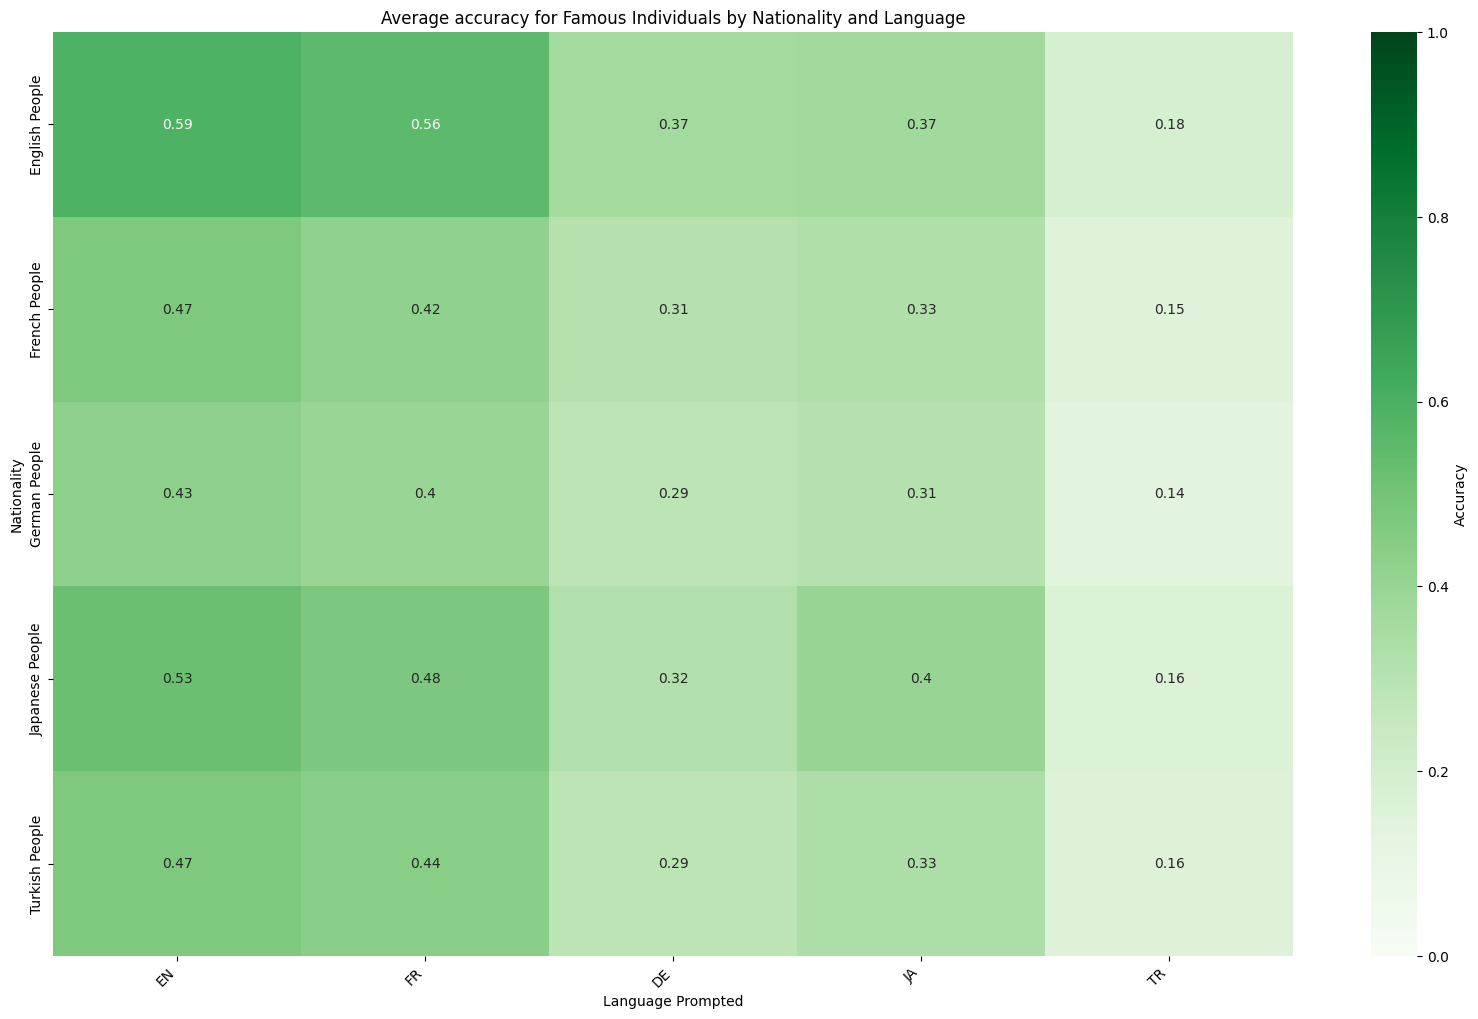

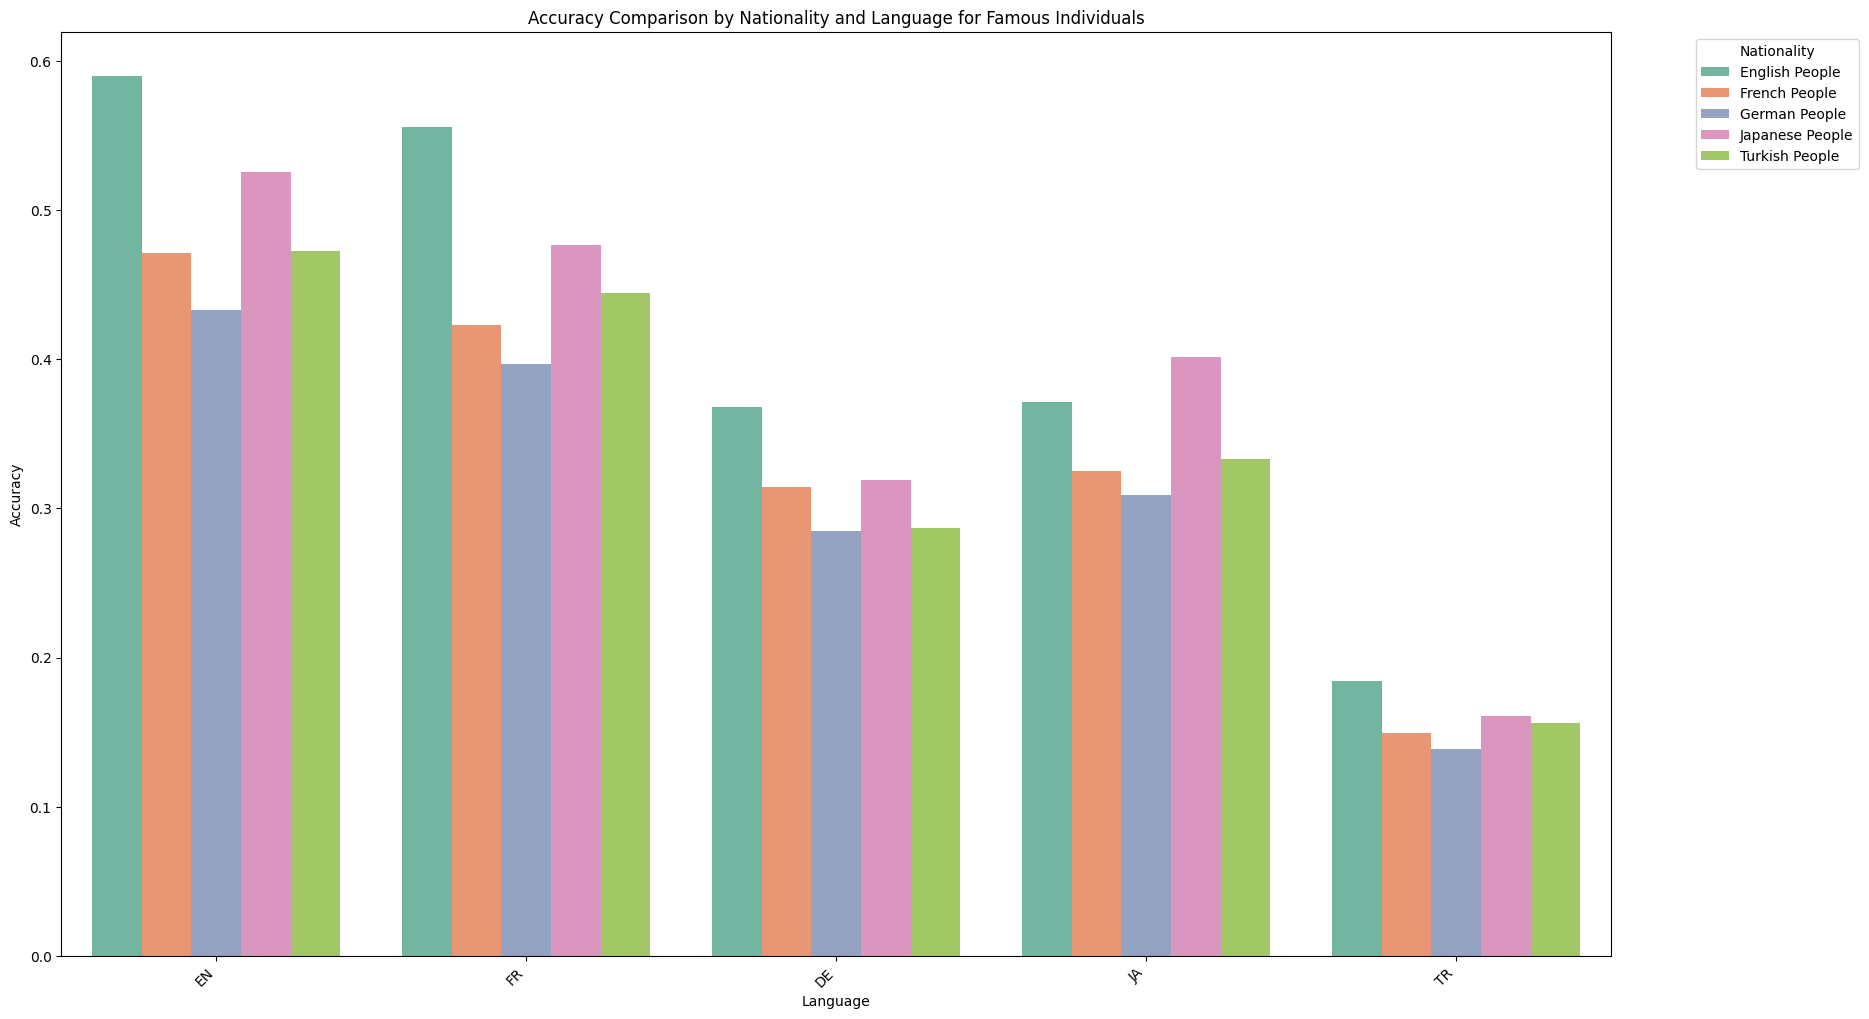

In [7]:

# Calculate the accuracy for each group of language for open-ended dataset
for group in oe_dataset:
    accuracy_df = oe_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'Open-Ended'
    accuracy_oe_df.append(accuracy_df)

# Calculate the accuracy for each group of language for multiple choice dataset
for group in mc_dataset:
    accuracy_df = mc_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'Multiple Choice'
    accuracy_mc_df.append(accuracy_df)

# Calculate the accuracy for each group of language for true/false dataset
for group in tf_dataset:
    accuracy_df = tf_dataset[group].groupby(['Language'])['Compared_Answer'].mean().reset_index()
    accuracy_df['Nationality'] = group
    accuracy_df['Prompt_Type'] = 'True/False'
    accuracy_tf_df.append(accuracy_df)

# Combine all accuracy dataframes
accuracy_combined_df = pd.concat(accuracy_oe_df + accuracy_mc_df + accuracy_tf_df, ignore_index=True)

# Group by Language and Nationality to get the mean accuracy
accuracy_combined_df = accuracy_combined_df.groupby(['Language', 'Nationality'])['Compared_Answer'].mean().reset_index()

# Set the order of categories to ensure symmetrical axes
nationality_order = ['English People', 'French People', 'German People', 'Japanese People', 'Turkish People']
language_order = ['EN', 'FR', 'DE', 'JA', 'TR']

# Convert 'Nationality' and 'Language' to categorical with the specified order
accuracy_combined_df['Nationality'] = pd.Categorical(accuracy_combined_df['Nationality'], categories=nationality_order, ordered=True)
accuracy_combined_df['Language'] = pd.Categorical(accuracy_combined_df['Language'], categories=language_order, ordered=True)

# Pivot the DataFrame for the heatmap
heatmap_data = accuracy_combined_df.pivot_table(index='Nationality', columns='Language', values='Compared_Answer')

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'})

plt.title('Average accuracy for Famous Individuals by Nationality and Language')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Language Prompted')
plt.ylabel('Nationality')
plt.show()

# Plot the bar chart
plt.figure(figsize=(20, 12))
sns.barplot(x='Language', y='Compared_Answer', hue='Nationality', data=accuracy_combined_df, ci=None, palette='Set2',
            order=language_order, hue_order=nationality_order)

plt.title('Accuracy Comparison by Nationality and Language for Famous Individuals')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:
# Output the table of all results
print(accuracy_combined_df)


   Language      Nationality  Compared_Answer
0        DE   English People         0.367998
1        DE    French People         0.314059
2        DE    German People         0.285178
3        DE  Japanese People         0.319184
4        DE   Turkish People         0.286952
5        EN   English People         0.589851
6        EN    French People         0.471291
7        EN    German People         0.432998
8        EN  Japanese People         0.525760
9        EN   Turkish People         0.472384
10       FR   English People         0.555576
11       FR    French People         0.422962
12       FR    German People         0.396766
13       FR  Japanese People         0.476510
14       FR   Turkish People         0.444130
15       JA   English People         0.371625
16       JA    French People         0.325229
17       JA    German People         0.308770
18       JA  Japanese People         0.401594
19       JA   Turkish People         0.333107
20       TR   English People      

In [9]:
# Extract the scores for each language and their respective nationalities
language_nationality_scores = {
    'EN': accuracy_combined_df[(accuracy_combined_df['Language'] == 'EN') & (accuracy_combined_df['Nationality'] == 'English People')],
    'TR': accuracy_combined_df[(accuracy_combined_df['Language'] == 'TR') & (accuracy_combined_df['Nationality'] == 'Turkish People')],
    'DE': accuracy_combined_df[(accuracy_combined_df['Language'] == 'DE') & (accuracy_combined_df['Nationality'] == 'German People')],
    'FR': accuracy_combined_df[(accuracy_combined_df['Language'] == 'FR') & (accuracy_combined_df['Nationality'] == 'French People')],
    'JA': accuracy_combined_df[(accuracy_combined_df['Language'] == 'JA') & (accuracy_combined_df['Nationality'] == 'Japanese People')]
}

# Prepare a DataFrame to store the results
comparison_df = pd.DataFrame(columns=['Language', 'Nationality', 'Prompt_Type', 'Accuracy'])

# Populate the DataFrame with the extracted scores
for lang, df in language_nationality_scores.items():
    comparison_df = pd.concat([comparison_df, df], ignore_index=True)

# Display the comparison DataFrame
print(comparison_df)

# Analyze the results to find interesting insights
insights = []

for index, row in comparison_df.iterrows():
    insights.append(f"In {row['Language']} ({row['Prompt_Type']}), the accuracy for {row['Nationality']} is {row['Compared_Answer']:.2f}.")

# Print insights
for insight in insights:
    print(insight)

  Language      Nationality Prompt_Type Accuracy  Compared_Answer
0       EN   English People         NaN      NaN         0.589851
1       TR   Turkish People         NaN      NaN         0.156139
2       DE    German People         NaN      NaN         0.285178
3       FR    French People         NaN      NaN         0.422962
4       JA  Japanese People         NaN      NaN         0.401594
In EN (nan), the accuracy for English People is 0.59.
In TR (nan), the accuracy for Turkish People is 0.16.
In DE (nan), the accuracy for German People is 0.29.
In FR (nan), the accuracy for French People is 0.42.
In JA (nan), the accuracy for Japanese People is 0.40.


In [10]:
insights

['In EN (nan), the accuracy for English People is 0.59.',
 'In TR (nan), the accuracy for Turkish People is 0.16.',
 'In DE (nan), the accuracy for German People is 0.29.',
 'In FR (nan), the accuracy for French People is 0.42.',
 'In JA (nan), the accuracy for Japanese People is 0.40.']

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming you have a DataFrame 'accuracy_combined_df' with columns 'Language', 'Nationality', and 'Compared_Answer'
# Set the order of categories to ensure symmetrical axes
nationality_order = ['English People', 'French People', 'German People', 'Japanese People', 'Turkish People']
language_order = ['EN', 'FR', 'DE', 'JA', 'TR']

# Convert 'Nationality' and 'Language' to categorical with the specified order
accuracy_combined_df['Nationality'] = pd.Categorical(accuracy_combined_df['Nationality'], categories=nationality_order, ordered=True)
accuracy_combined_df['Language'] = pd.Categorical(accuracy_combined_df['Language'], categories=language_order, ordered=True)

# Create a mapping to indicate if the language matches the nationality
nationality_language_map = {
    'English People': 'EN',
    'French People': 'FR',
    'German People': 'DE',
    'Japanese People': 'JA',
    'Turkish People': 'TR'
}

# Add a column to indicate if the language matches the nationality
accuracy_combined_df['Matches_Nationality'] = accuracy_combined_df.apply(
    lambda row: 1 if nationality_language_map[row['Nationality']] == row['Language'] else 0, axis=1
)

# Calculate Pearson correlation between Matches_Nationality and Accuracy
matches_accuracy_corr, p_value = pearsonr(accuracy_combined_df['Matches_Nationality'], accuracy_combined_df['Compared_Answer'])

# Print the results
print(f"Pearson correlation between Matching Nationality-Language and Accuracy: {matches_accuracy_corr}")
print(f"P-value: {p_value}")

# Optional: Display the head of the dataframe to verify the new column
print(accuracy_combined_df.head())


Pearson correlation between Matching Nationality-Language and Accuracy: 0.06121800087962141
P-value: 0.7712869349868742
  Language      Nationality  Compared_Answer  Matches_Nationality
0       DE   English People         0.367998                    0
1       DE    French People         0.314059                    0
2       DE    German People         0.285178                    1
3       DE  Japanese People         0.319184                    0
4       DE   Turkish People         0.286952                    0
